In [1]:
#  IMPORT THE NECESSARY LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOAD THE DATASET

df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:

import warnings
warnings.filterwarnings('ignore')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:

df.drop('Unnamed: 0', axis=1, inplace= True)

In [6]:
# checking shape of the dataset

df.shape

(200, 4)

In [7]:
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [8]:
# checking  null value in dataset

df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
# brief summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# descriptive information about dataset

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
# checking correlation of dataset

df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

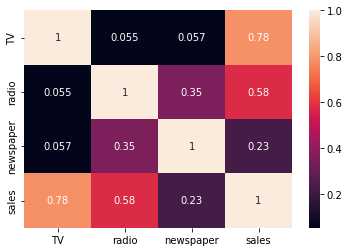

In [12]:
# again checking correlation through  heatmap

sns.heatmap(df.corr(), annot=True)

In [ ]:
# 'TV' correlation strength is high with target_variable 

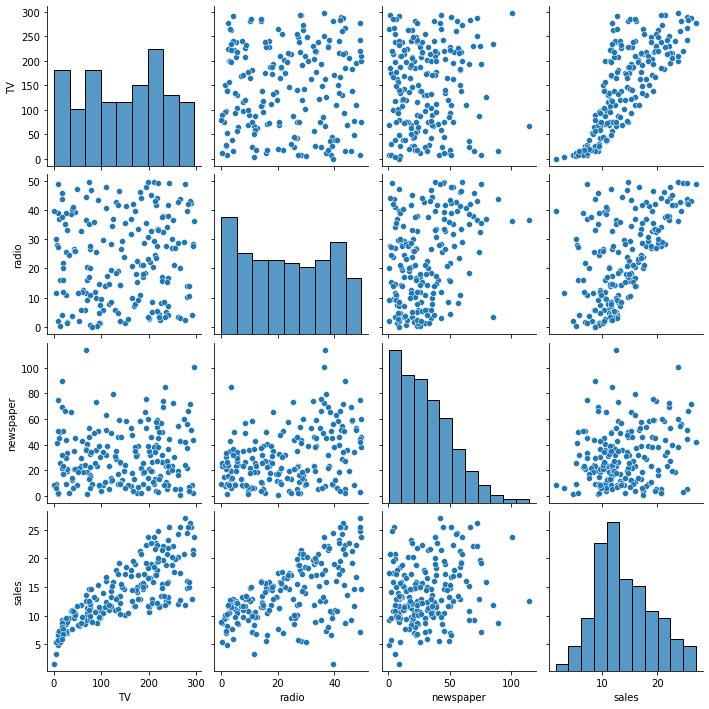

In [13]:
# checking pairplot

sns.pairplot(df)
plt.show()

#  'TV' feature positive linear distributed with target_variable, 
# 'Radio' features also distributed positive linear
# 'newspaper' random distributed with  target variable


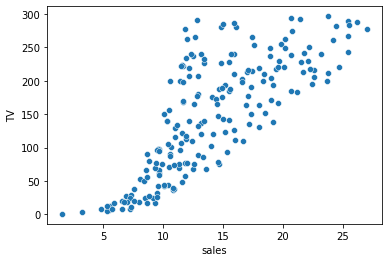

In [60]:
# we plot seperate scatterplot
sns.scatterplot('sales', 'TV', data=df)
plt.show()

In [ ]:
# 'TV' , 'sales' are positive linear distributed means TV_ adds going to high than "sales" is also going high

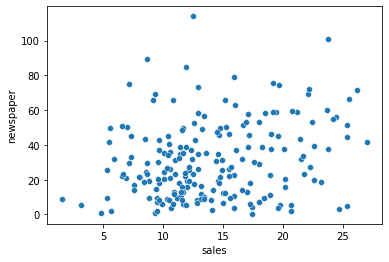

In [15]:

sns.scatterplot('sales', 'newspaper', data=df)
plt.show()

In [ ]:
# 'sales' and 'newspaper' equally dsitribution no seen any relation between 'newspaper' and 'sales'

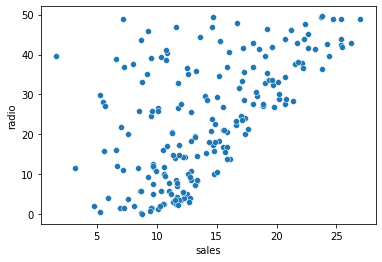

In [16]:
# plotting scatterplot to check relation between 'sales' and 'radio'
sns.scatterplot('sales', 'radio', data=df)
plt.show()

In [ ]:
# we seen distribution between 'radio' and 'sales', that is minimum linear distributed 

In [ ]:
# we seen all the graph and last we make a decision 'TV' gives more information about 'sales' 
#    and 'TV' feature is higly correlated to 'sales' target Variable

#  'TV' adds are more effective for  product 'sales' target_variable

<AxesSubplot:xlabel='TV', ylabel='Density'>

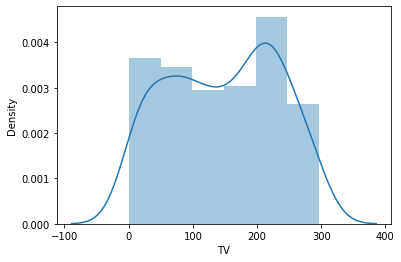

In [19]:
# let's check distribution plot

sns.distplot(df['TV'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

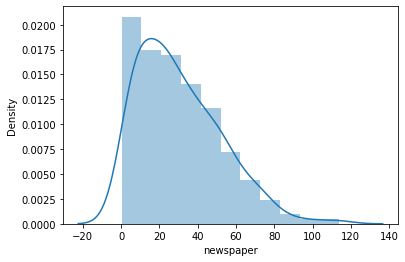

In [20]:

sns.distplot(df['newspaper'])


<AxesSubplot:xlabel='radio', ylabel='Density'>

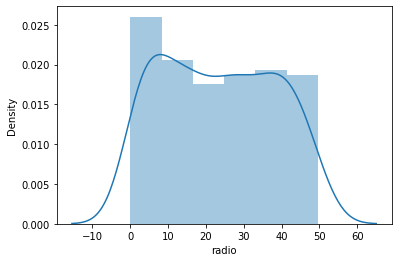

In [21]:

sns.distplot(df['radio'])

In [ ]:
#  CHECKING SKEWNESS

In [19]:

df[['TV','radio','newspaper']].skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [20]:
df['newspaper']= np.sqrt(df['newspaper'])

0.06238771883281062


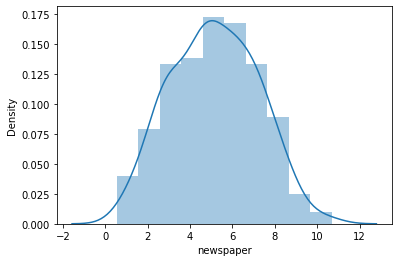

In [21]:
# checking distribution again after changing skewness
sns.distplot(df['newspaper'])

print(df['newspaper'].skew())

In [ ]:
#  LET'S CHECK OUTLIERS

In [22]:
#  CHECKING OUTLIERS
from scipy.stats import zscore

(np.abs(zscore(df[['radio','newspaper','TV']]))<3).all()

# no outliers found

radio        True
newspaper    True
TV           True
dtype: bool

In [23]:
# input_features
x= df.drop('sales', axis=1)

# target_variable
y= df.sales

In [24]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [25]:
sc= StandardScaler()
scaled= sc.fit_transform(x)

In [26]:
# LET'S MAKE USE 'SVR'
# IN TRAINING PROCESS           # finding best random_state for  'SVC'

from sklearn.svm import SVR

max_acu= 0
max_rs= 0
for r_state in range(50,200):
    x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.20,)
    svm = SVR()
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    accu = r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)



maximum accuracy : 0.9238480237378937  random_state is : 50
maximum accuracy : 0.9363768398159182  random_state is : 57
maximum accuracy : 0.9513897210787806  random_state is : 61
maximum accuracy : 0.9519113483119117  random_state is : 63
maximum accuracy : 0.9529295664064215  random_state is : 64
maximum accuracy : 0.9598366944215069  random_state is : 188


In [27]:
# 
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import KFold
kfold= KFold(n_splits=5, shuffle=True, random_state=459)


    
def model_score(model,xtrain,ytrain,x_test,y_test):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtrain)
    y_pred= model.predict(x_test)
    print('training_score =', r2_score(ytrain,pred))
        
    print('test_r2_score=', r2_score(y_test,y_pred))
    print('mean_absolute_error \n', mean_absolute_error(y_test,y_pred))
    

def cross_val(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('\n\ncross_val_score with', algo,'=', cv_score.mean())
    

In [28]:
# LET'S FIT A MODEL WITH SVR                                  # finding best random_state=188  for  'SVC' 

x_train, x_test, y_train,y_test= train_test_split(scaled,y, test_size=0.25, random_state=188 )
sv_r= SVR()

model_score(sv_r, x_train,y_train,x_test,y_test)


# CHECKING     CROSS_VAL_SCORE
cross_val(sv_r,x_train,y_train,'svr')    

training_score = 0.9114240871759056
test_r2_score= 0.9611658869105559
mean_absolute_error 
 0.6287873268582738


cross_val_score with svr = 0.8650662397836146


In [29]:

# IN TRAINING PROCESS                 # finding best random_state for  randomforest

from sklearn.ensemble import RandomForestRegressor

max_acu= 0
max_rs= 0
for r_state in range(50,200):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accu = r2_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.9819815733269727  random_state is : 50
maximum accuracy : 0.9841569285323448  random_state is : 56
maximum accuracy : 0.9865904003103996  random_state is : 57
maximum accuracy : 0.9867060438757104  random_state is : 154
maximum accuracy : 0.9872158243184179  random_state is : 156


In [30]:
# LET'S TRAIN & TEST A MODEL WITH RANDOMFOREST-REGRESSOR
                                          # finding best random_state=191  for  'ADABOOST_REGRESSOR' 

x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=156 )
rf = RandomForestRegressor()

model_score(rf , x_train,y_train,x_test,y_test)


# CHECKING     CROSS_VAL_SCORE
cross_val(rf,x_train,y_train,'randomforest')
    

training_score = 0.9962439009905847
test_r2_score= 0.9884357027176611
mean_absolute_error 
 0.40515999999999985


cross_val_score with randomforest = 0.970937926984423


In [31]:
# IN TRAINING PROCESS              # finding best random_state for  'adaboost'

from sklearn.ensemble import AdaBoostRegressor

max_acu= 0
max_rs= 0
for r_state in range(50,200):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,)
    AD = AdaBoostRegressor()
    
    AD.fit(x_train,y_train)
    y_pred=AD.predict(x_test)
    accu = r2_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.9573200588214584  random_state is : 50
maximum accuracy : 0.9613912895101691  random_state is : 53
maximum accuracy : 0.9710504780546255  random_state is : 57
maximum accuracy : 0.971978884160376  random_state is : 69
maximum accuracy : 0.9725121251833753  random_state is : 105


In [32]:
# LET'S TRAIN & TEST A MODEL WITH ADABOOST-REGRESSOR
                     # finding best random_state=112  for  'ADABOOST REGRESSOR' 

x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.25, random_state= 105)
AD = AdaBoostRegressor()

model_score(AD , x_train,y_train,x_test,y_test)


# CHECKING     CROSS_VALIDATION
cross_val(AD,x_train,y_train,'ADABOOST_REGRESSOR')
    

training_score = 0.9753071108592933
test_r2_score= 0.9719007378274751
mean_absolute_error 
 0.7092506676958337


cross_val_score with ADABOOST_REGRESSOR = 0.9319004431227198


In [33]:

# IN TRAINING PROCESS                  # finding best random_state for  'gradientBoosting'

from sklearn.ensemble import GradientBoostingRegressor

max_acu= 0
max_rs= 0
for r_state in range(50,200):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,)
    GB = GradientBoostingRegressor()
    
    GB.fit(x_train,y_train)
    y_pred=GB.predict(x_test)
    accu = r2_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.987299660693223  random_state is : 50
maximum accuracy : 0.9881420239431229  random_state is : 59
maximum accuracy : 0.9887096137220648  random_state is : 75
maximum accuracy : 0.9900805995925697  random_state is : 105


In [49]:
# LET'S TRAIN & TEST A MODEL WITH GRADIENTBOOSTing-REGRESSOR
                          # finding best random_state=105  for  'GRADIENT-BOOSTING REGRESSOR' 

x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=105 )
gb = GradientBoostingRegressor()

model_score(gb , x_train,y_train,x_test,y_test)


# CHECKING     CROSS_VALIDATION
cross_val(gb, x_train,y_train,'GRADIENT-BOOSTING_REGRESSOR')
    

training_score = 0.998989279051937
test_r2_score= 0.990093545946399
mean_absolute_error 
 0.4311030223449845


cross_val_score with GRADIENT-BOOSTING_REGRESSOR = 0.9704582391499089


In [41]:
#
ind=['SVR','RandomForest_R','Adaboost_R', 'GradientBoosting_R']
pd.DataFrame({'Test-r2_score':[96,98,97,99],'cross_valdidation_score':[86,97,93,97]}, index=ind)

,Test-r2_score,cross_valdidation_score
SVR,96,86
RandomForest_R,98,97
Adaboost_R,97,93
GradientBoosting_R,99,97


In [36]:
#  USING  HYPER-PARAMETER-TUNING  WITH  GRIDSEARCHCV

from sklearn.model_selection import GridSearchCV

In [42]:
rf= RandomForestRegressor()

param= {'n_estimators':[60,120], 'max_depth':[2,3,4,5],'min_samples_split':[2,3],'min_samples_leaf':[1,2]}
grid= GridSearchCV(rf, param, cv=5, )

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [60, 120]})

In [43]:
cls=grid.best_estimator_
cls.fit(x_train,y_train)

pred= cls.predict(x_test)
print('r2-score=', r2_score(y_test,pred))

r2-score= 0.9744768528721688


In [ ]:
#  LET'S USE  HYPER-PARAMETER-TUNING  OVER  GRADIENTBOOSTING-REGRESSOR

In [44]:
gb= GradientBoostingRegressor()

param= {'n_estimators':[60,120], 'learning_rate':[0.1,1.0], 'max_depth':[2,4,5],'subsample':[0.8,1.0]}
grid1= GridSearchCV(gb, param, cv=5, )

grid1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 1.0], 'max_depth': [2, 4, 5],
                         'n_estimators': [60, 120], 'subsample': [0.8, 1.0]})

In [46]:
gb_r=grid1.best_estimator_
gb_r.fit(x_train,y_train)

pred1= gb_r.predict(x_test)
print('r2-score=', r2_score(y_test,pred1))

r2-score= 0.9834662575608036


In [ ]:
# gradient boosting score highest with gridsearchcv hyperparameter

In [47]:
# SAVE THE MODEL

import pickle

In [51]:
advertising_sales_model = 'advertising_sales_model.pickle'

pickle.dump(gb_r,open(advertising_sales_model,'wb'))

In [52]:
#  load the  save model
model= pickle.load(open(advertising_sales_model, 'rb'))

In [57]:

model.predict(x_test)

array([16.57324087, 14.0801018 , 24.72687582, 11.55837058, 20.04659253,
        8.66371864, 21.20173426, 11.32727279, 10.07810043, 15.45671411,
       12.55135413, 14.42875894, 21.29868935, 23.69298987, 10.27155313,
       12.91235806, 26.08396653, 12.77491245,  5.74002441, 12.00182809,
       14.35907276,  6.88130997, 18.72222129, 23.00505075,  5.30873517,
       11.71532206, 12.1518843 , 11.73223515, 10.19558731, 15.39631901,
       16.35202978,  6.46652041, 10.97272778,  6.69484787, 22.05356048,
        9.34627989, 15.76827224, 12.80953554, 15.73979003, 14.3687598 ,
       19.71671393, 15.32183631, 10.02465612,  6.88796628, 12.15494968,
       16.49410795, 12.39106905,  3.96528656, 22.19248084, 20.28742077])

In [ ]:
# 1.  do analysis the dataset through data_visualization
# 2.  checking skewness and remove the skewness
#3. checking  outliers , no outliers in dataset
# 4.  train & test the model over the dataset
# 5.  cross_validation
# 6. using Hyper_Parameter_Tuning with GridSearchCV
# 7. save the model  'gradiantboosting_model'